In [32]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [33]:
train_images.shape

(60000, 28, 28)

In [34]:
len(train_labels)

60000

In [35]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

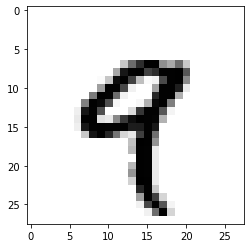

In [36]:
digit = train_images[4]

import matplotlib.pyplot as plt

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [7]:
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


In [8]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10,activation='softmax'))

In [9]:
# 옵티마이저, 손실함수, 지표 설정

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [10]:
# 모든 값을 0과 1사이로 스케일링
# [0, 255]사이의 값인 unit8 타입의 (60000, 28*28)  --> 0과1사이의 값을 가지는 float32타입의 (60000, 28*28) 크기의 배열로 변경.

train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

In [12]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [13]:
# 신경망 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1056 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0500 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0377 - accuracy: 0.9887


In [14]:
# test데이터 확인

test_loss, test_acc=network.evaluate(test_images, test_labels)

#--> 과대적합. train의 정확도에 비해 낮음. 

313/313 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9797


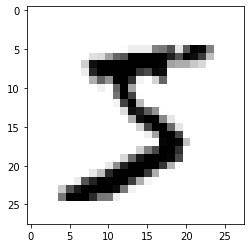

In [22]:
import matplotlib.pyplot as plt

plt.imshow(train_images.reshape(-1, 28, 28)[0], cmap=plt.cm.binary)
plt.show()



# 2-2 신경망 데이터 표현

In [18]:
## 2.2.1 스칼라(0D 텐서)

import numpy as np
x=np.array(12)
x

array(12)

In [19]:
x.ndim

0

In [41]:
## 2.2.2 벡터 (1D 텐서)

x=np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

In [23]:
# 행렬(3D 텐서)

x=np.array([[5, 78, 2, 34, 0],
            [6, 79, 2, 34, 0],
            [7, 80, 4, 36, 2]])
x.ndim

2

In [24]:
# 3D 텐서와 고차원 텐서
x=np.array([[[5, 78, 2, 34, 0],
            [6, 79, 2, 34, 0],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 2, 34, 0],
            [7, 80, 4, 36, 2]],
            [[5, 78, 2, 34, 0],
            [6, 79, 2, 34, 0],
            [7, 80, 4, 36, 2]]])
x.ndim

3

In [37]:
## 2.2.6 넘파이로 텐서 조작하기

my_slice=train_images[10:100]
my_slice.shape

(90, 28, 28)

In [38]:
my_slice=train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [39]:
my_slice=train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

## 2.3 텐서 연산

In [43]:
keras.layers.Dense(512, activation='relu')
output=relu(dot(W, input)+b)
output

NameError: ignored

In [ ]:
## 2.3.1 원소별 연산

z=x+y   #원소별 덧셈
z=np.maximum(z,0.)  #원소별 렐루함수

In [47]:
## 2.3.2 브로드 캐스팅
# : 2D 텐서와 벡터간의 연산

x=np.random.random((64, 3, 32, 10))
y=np.random.random((32, 10))

z=np.maximum(x, y)
z.shape

(64, 3, 32, 10)

In [ ]:
## 2.3.3 텐서 점곱
# : 입력텐서의 원소들을 결합

# x.shape: (a,b)
# y.sahpe: (b,c)
# z=dot(x,y)   # z.shape: (a,c)

In [48]:
## 2.3.4 텐서 크기 변환
# : 변환된 텐서는 원래 텐서와 원소개수가 동일하다.

x=np.array([[0., 1.],
            [2., 3.],
            [4., 5.]])
print(x.shape)

x=x.reshape((6,1))
x

(3, 2)


array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [49]:
x=x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [50]:
# 전치
x=np.zeros((300,20))
x=np.transpose(x)
print(x.shape)

(20, 300)


## 2.4.3 확률적 경사하강법

In [1]:
import matplotlib.pyplot as plt
from keras import models, layers, losses

network = models.Sequential()
network.add(layers.Dense(1))

network.compile(optimizer='SGD', loss='mean_squared_error')

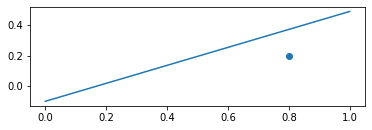

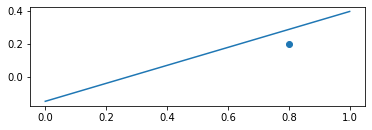

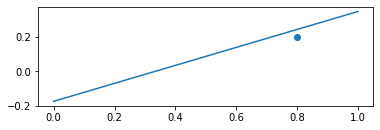

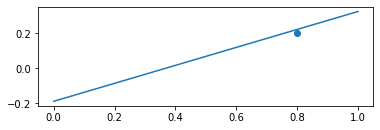

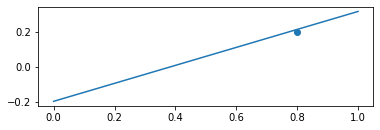

In [3]:
# 최적화 과정 시각화
import numpy as np

x = np.array([[0.8]])
y = np.array([[0.2]])

for i in range(5):
    l = np.linspace(0,1,100)
    network.fit(x, y, epochs=20, verbose=0)

    plt.subplot(211)
    plt.scatter(x, y)
    plt.plot(l, network.predict(l))
    plt.show()